In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Lists of classifiers, selectors, and aggregation metrics
classifiers = ["logisticregression", "randomf", "xgb"]
selectors = ["lasso", "mrmr", "anova"]
aggregations = ["largest", "unweighted", "weighted", "3largest"]

base_path = "/Users/laiacoronassala/Desktop/predicting_immunotherapy_response/"
data_list = []

# Iterate through all combinations
for agg in aggregations:
    folder = "results"+agg
    folder_path = os.path.join(base_path, folder)
    for clf in classifiers:
        for sel in selectors:
            file_name = f"{sel}_{clf}.json"
            file_path = os.path.join(folder_path, file_name)
            print(file_name)
            if os.path.exists(file_path):
                with open(file_path, 'r') as file:
                    data = json.load(file)
                data_list.append({
                    "aggregation": agg,
                    "classifier": clf,
                    "selector": sel,
                    "average_auc": data["Average_AUC"],
                    "std_dev_auc": data["Standard_Deviation_AUC"]
                })

lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json
lasso_logisticregression.json
mrmr_logisticregression.json
anova_logisticregression.json
lasso_randomf.json
mrmr_randomf.json
anova_randomf.json
lasso_xgb.json
mrmr_xgb.json
anova_xgb.json


In [3]:
df=pd.DataFrame(data_list)
# df.to_csv("nestedcv_results.csv")

In [4]:
print(max(df['average_auc']))

0.8013095238095239


/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(*plot_args, **plot_kwargs)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `line

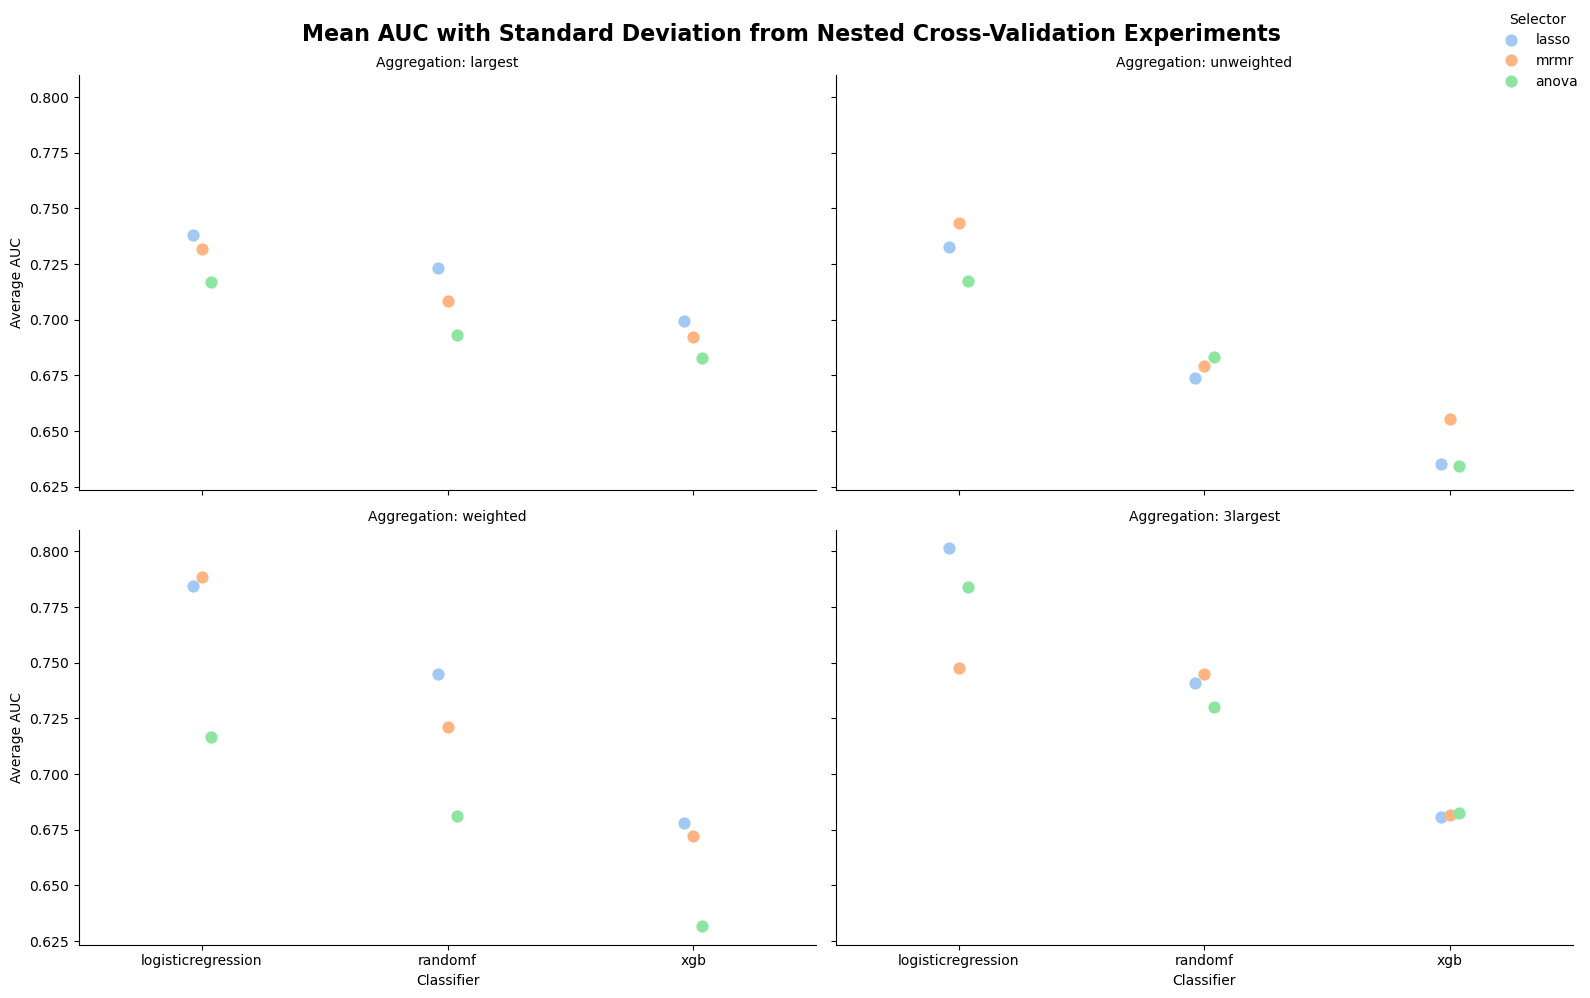

In [5]:
# Use a vibrant color palette
palette_vibrant = sns.color_palette("pastel", 3)
# Create the adjusted FacetGrid of pointplots
g = sns.FacetGrid(df, col="aggregation", col_wrap=2, height=5, aspect=1.5, sharey=True)
#g.map(sns.pointplot, "classifier", "average_auc", "selector", ci="std_dev_auc", join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True, capsize=0.2)
g.map(sns.pointplot, "classifier", "average_auc", "selector", join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True, capsize=0.2)
g.add_legend(title="Selector",loc = 1)
#plt.errorbar(df['classifier'], df['average_auc'], yerr=df['std_dev_auc'], fmt='o', color=color, capsize=5, label='std')

# Adjust titles and labels
g.set_axis_labels("Classifier", "Average AUC")
g.set_titles("Aggregation: {col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Mean AUC with Standard Deviation from Nested Cross-Validation Experiments", fontsize=16, fontweight='bold')

# Display the plots
plt.tight_layout()
plt.show()

/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  func(*plot_args, **plot_kwargs)
/Users/laiacoronassala/opt/anaconda3/envs/envlaia/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `line

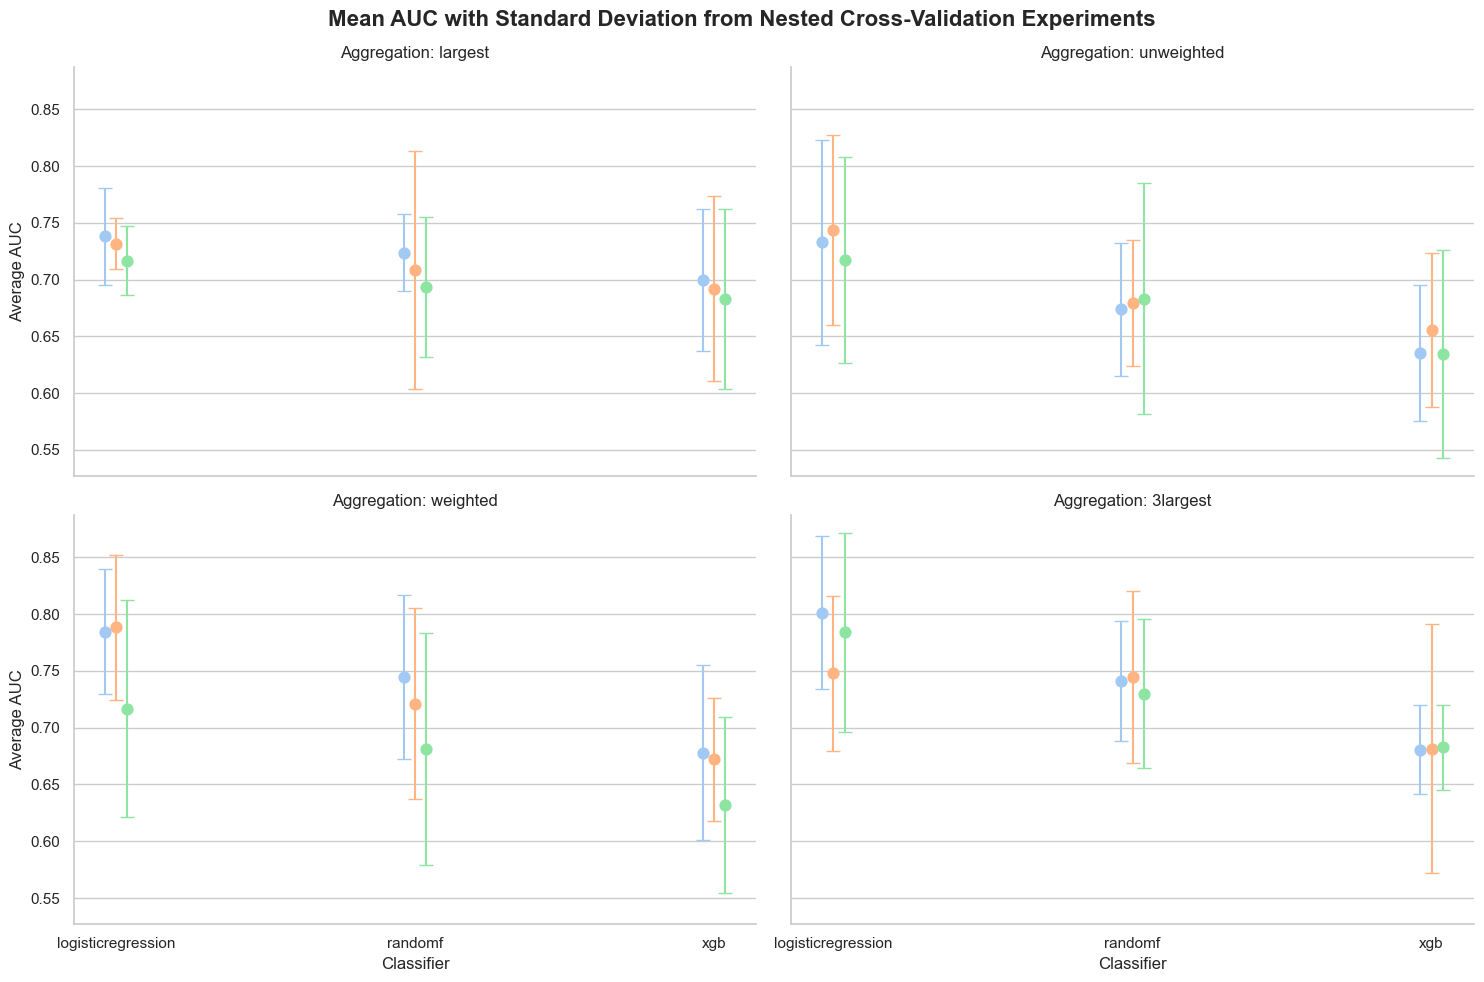

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


palette_vibrant = sns.color_palette("pastel", len(df['selector'].unique()))

g = sns.FacetGrid(df, col="aggregation", col_wrap=2, height=5, aspect=1.5, sharey=True)
g.map(sns.pointplot, "classifier", "average_auc", "selector", 
      join=False, markers='o', linestyles='', palette=palette_vibrant, dodge=True)

num_selectors = len(df['selector'].unique())
dodge_amount = 0.038

for ax, agg in zip(g.axes.flatten(), df['aggregation'].unique()):
    subset = df[df['aggregation'] == agg]
    classifiers = subset['classifier'].unique()
    for i, selector in enumerate(subset['selector'].unique()):
        subset_selector = subset[subset['selector'] == selector]
        xvals = np.arange(len(classifiers)) + dodge_amount * (i - (num_selectors - 1) / 2)
        color = palette_vibrant[i]  
        ax.errorbar(xvals, subset_selector['average_auc'], 
                    yerr=subset_selector['std_dev_auc'], fmt='none', 
                    capsize=5, color=color)

g.set_axis_labels("Classifier", "Average AUC")
g.set_titles("Aggregation: {col_name}")
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Mean AUC with Standard Deviation from Nested Cross-Validation Experiments", 
               fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()
